In [1]:
import csv
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math

In [2]:
import seaborn as sns

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split


In [4]:
def poly_reg1(X_F1,y_F1,x,y):
    poly = PolynomialFeatures(degree=2)
    X_F1_poly = poly.fit_transform(X_F1)

    X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                       random_state = 0)
    linreg = LinearRegression().fit(X_train, y_train)

    print('(poly deg 2) linear model coeff (w):\n{}'
         .format(linreg.coef_))
    print('(poly deg 2) linear model intercept (b): {:.3f}'
         .format(linreg.intercept_))
    print('(poly deg 2) R-squared score (training): {:.3f}'
         .format(linreg.score(X_train, y_train)))
    print('(poly deg 2) R-squared score (test): {:.3f}\n'
         .format(linreg.score(X_test, y_test)))
    
    plt.scatter(X_F1, y_F1, color='red')
    plt.plot(X_F1, linreg.predict(poly.fit_transform(X_F1)), color='blue')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    return([linreg.coef_,linreg.intercept_])


In [20]:
def poly_reg2(X_F1,y_F1,x,y):
    poly = PolynomialFeatures(degree=2)
    x=np.asarray(X_F1['lum/pix'])
    x=x.reshape(-1,1)

    X_F1_poly = poly.fit_transform(x)


    X_train, X_test, y_train, y_test = train_test_split(X_F1_poly, y_F1,
                                                       random_state = 0)
    
    linreg = LinearRegression().fit(X_train,
                                    y_train)

    print('(poly deg 2) linear model coeff (w):\n{}'
         .format(linreg.coef_))
    print('(poly deg 2) linear model intercept (b): {:.3f}'
         .format(linreg.intercept_))
    print('(poly deg 2) R-squared score (training): {:.3f}'
         .format(linreg.score(X_train, y_train)))
    print('(poly deg 2) R-squared score (test): {:.3f}\n'
         .format(linreg.score(X_test, y_test)))
    
    plt.scatter(X_F1, y_F1, color='red')
    plt.plot(X_F1, linreg.predict(poly.fit_transform(X_F1)), color='blue')
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()
    return([linreg.coef_,linreg.intercept_])


In [14]:
gdpppp=pd.read_csv('important/done/newppp_data.csv')

In [15]:
gdpppp.drop(gdpppp.loc[gdpppp['year']==1992.0].index,inplace=True)

In [16]:
gdpppp.sort_values(['lum/pix'],axis=0,ascending=True,inplace=True)

In [17]:
gdpppp

,country,year,pixels,luminosity,lum/pix,population,PPPGDP
260,Korea,2009.0,500337.0,3.786700e+04,0.075683,24428341,1.460000e+12
244,Korea,1993.0,500337.0,4.171500e+04,0.083374,21265834,4.890000e+11
259,Korea,2008.0,500337.0,4.317000e+04,0.086282,24310142,1.470000e+12
323,Russia,2018.0,468000000.0,3.712375e+07,0.097493,144477860,4.220000e+12
247,Korea,1996.0,500337.0,5.662500e+04,0.113174,22113438,6.700000e+11
...,...,...,...,...,...,...,...
117,Germany,2001.0,1000532.0,1.593067e+07,15.922199,82349925,2.340000e+12
116,Germany,2000.0,1000532.0,1.598375e+07,15.975254,82211508,2.240000e+12
115,Germany,1999.0,1000532.0,1.672153e+07,16.712642,82100243,2.160000e+12
118,Germany,2002.0,1000532.0,1.678682e+07,16.777896,82488495,2.410000e+12


In [18]:
gdp_pop=gdpppp[['lum/pix','population']]

(poly deg 2) linear model coeff (w):
[ 0.00000000e+00 -2.03467143e+11  3.44203505e+09]
(poly deg 2) linear model intercept (b): 3841204481459.730
(poly deg 2) R-squared score (training): 0.021
(poly deg 2) R-squared score (test): -0.083



ValueError: x and y must be the same size

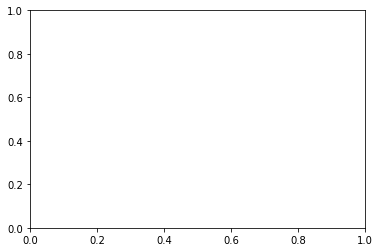

In [22]:
poly_reg2(gdp_pop,gdpppp['PPPGDP'],'population_luminosity','gdp')

In [ ]:
ax=sns.lmplot(x='luminosity',y='gdplog',data=gdpconsdf,order=2,scatter_kws={"s": 80})